# Lab 9 Membership Attacks

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

print("Library Versions:")
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('tensorflow:',tf.__version__)
print('tensorflow probability:', tfp.__version__)

Library Versions:
numpy: 1.24.3
pandas: 1.5.3
tensorflow: 2.13.0
tensorflow probability: 0.21.0


In [195]:
n_epochs = 200
verbose_option = True

In [196]:
metrics = {}

# Classification for Ship Detection


Load Ship Detection Dataset

In [197]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

ROOT_PATH = "shipsnet"
LR = 1e-3
BATCH_SIZE=1000

def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
train_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(ROOT_PATH,
                            labels = 'inferred',
                            label_mode = 'categorical',
                            class_names = None,
                            color_mode = "rgb",
                            batch_size = BATCH_SIZE,
                            image_size = (80, 80),
                            shuffle = True,
                            seed = 42,
                            subset="both",
                            validation_split = 0.2,
)

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

train_dataset_p = train_dataset.cache()
train_dataset_p = train_dataset_p.prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache()
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Using 800 files for validation.


Using Tensoflow, perform  non-linear binary classification model for the classification dataset.

In [198]:
inputs = layers.Input(shape=(80,80,3))
flat = layers.Flatten()(inputs)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

model = keras.Model(inputs=inputs, outputs=p)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [199]:
model.fit(train_dataset_p, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 3s 17ms/step - loss: 2.1467 - categorical_accuracy: 0.7491 - categorical_crossentropy: 2.1467
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.7190 - categorical_accuracy: 0.5888 - categorical_crossentropy: 0.7190
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5848 - categorical_accuracy: 0.7578 - categorical_crossentropy: 0.5848
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5015 - categorical_accuracy: 0.7659 - categorical_crossentropy: 0.5015
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4784 - categorical_accuracy: 0.7928 - categorical_crossentropy: 0.4784
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4592 - categorical_accuracy: 0.8003 - categorical_crossentropy: 0.4592
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4334 - categorical_accuracy: 0.8078 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.2450 - categorical_accuracy: 0.9009 - categorical_crossentropy: 0.2450
Epoch 58/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2397 - categorical_accuracy: 0.9041 - categorical_crossentropy: 0.2397
Epoch 59/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2361 - categorical_accuracy: 0.9053 - categorical_crossentropy: 0.2361
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2343 - categorical_accuracy: 0.9053 - categorical_crossentropy: 0.2343
Epoch 61/200
4/4 [==============================] - 0s 17ms/step - loss: 0.2342 - categorical_accuracy: 0.9059 - categorical_crossentropy: 0.2342
Epoch 62/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2357 - categorical_accuracy: 0.9038 - categorical_crossentropy: 0.2357
Epoch 63/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2387 - categorical_accuracy: 0.9034 - categorical_crossentropy

4/4 [==============================] - 0s 16ms/step - loss: 0.1775 - categorical_accuracy: 0.9303 - categorical_crossentropy: 0.1775
Epoch 114/200
4/4 [==============================] - 0s 17ms/step - loss: 0.1784 - categorical_accuracy: 0.9287 - categorical_crossentropy: 0.1784
Epoch 115/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1799 - categorical_accuracy: 0.9278 - categorical_crossentropy: 0.1799
Epoch 116/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1812 - categorical_accuracy: 0.9281 - categorical_crossentropy: 0.1812
Epoch 117/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1826 - categorical_accuracy: 0.9281 - categorical_crossentropy: 0.1826
Epoch 118/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1840 - categorical_accuracy: 0.9275 - categorical_crossentropy: 0.1840
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1857 - categorical_accuracy: 0.9259 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.1436 - categorical_accuracy: 0.9422 - categorical_crossentropy: 0.1436
Epoch 169/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1425 - categorical_accuracy: 0.9441 - categorical_crossentropy: 0.1425
Epoch 170/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1416 - categorical_accuracy: 0.9441 - categorical_crossentropy: 0.1416
Epoch 171/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1402 - categorical_accuracy: 0.9453 - categorical_crossentropy: 0.1402
Epoch 172/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1399 - categorical_accuracy: 0.9463 - categorical_crossentropy: 0.1399
Epoch 173/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1389 - categorical_accuracy: 0.9466 - categorical_crossentropy: 0.1389
Epoch 174/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1388 - categorical_accuracy: 0.9466 - categorical_crosse

Evaluate the classification model on the test data

In [200]:
metrics['Original Model'] = model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 1s 663ms/step - loss: 0.2357 - categorical_accuracy: 0.9112 - categorical_crossentropy: 0.2357
Original Model                                     Accuracy: 0.9112499952316284                                


In [201]:
train_examples = []
train_labels = []
for example, label in train_dataset_p.as_numpy_iterator():
    train_examples.append(example)
    train_labels.append(label)
train_examples = tf.concat(train_examples, axis=0)
train_labels = tf.concat(train_labels, axis=0)
print(train_examples.get_shape())
print(train_labels.get_shape())

(3200, 80, 80, 3)
(3200, 2)


In [202]:
examples, labels = list(test_dataset.as_numpy_iterator())[0]

In [203]:
model(np.reshape(examples[5],[1,80,80,3])).numpy()[0,0]

1.9329083

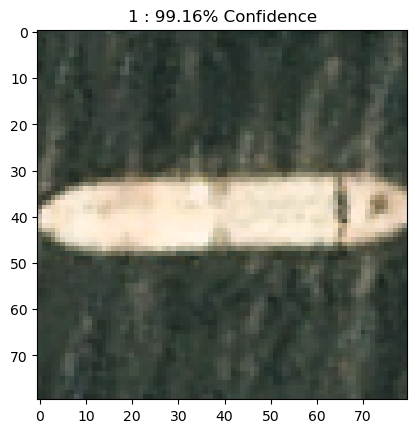

In [204]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

# Differential Privacy with Additive Gaussian Noise

In [234]:
inputs = layers.Input(shape=(80,80,3))
noise = layers.GaussianNoise(stddev=10)(inputs)
flat = layers.Flatten()(noise)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

sto_model = keras.Model(inputs=inputs, outputs=p)

sto_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [235]:
sto_model.fit(train_dataset_p, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 2s 17ms/step - loss: 2.8437 - categorical_accuracy: 0.5831 - categorical_crossentropy: 2.8437
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 2.2045 - categorical_accuracy: 0.7106 - categorical_crossentropy: 2.2045
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 1.5608 - categorical_accuracy: 0.6181 - categorical_crossentropy: 1.5608
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 1.4083 - categorical_accuracy: 0.5638 - categorical_crossentropy: 1.4083
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 1.1349 - categorical_accuracy: 0.6434 - categorical_crossentropy: 1.1349
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 1.0982 - categorical_accuracy: 0.6922 - categorical_crossentropy: 1.0982
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 1.0370 - categorical_accuracy: 0.6866 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.5877 - categorical_accuracy: 0.7487 - categorical_crossentropy: 0.5877
Epoch 58/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5890 - categorical_accuracy: 0.7453 - categorical_crossentropy: 0.5890
Epoch 59/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5871 - categorical_accuracy: 0.7444 - categorical_crossentropy: 0.5871
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5845 - categorical_accuracy: 0.7475 - categorical_crossentropy: 0.5845
Epoch 61/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5922 - categorical_accuracy: 0.7466 - categorical_crossentropy: 0.5922
Epoch 62/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5793 - categorical_accuracy: 0.7428 - categorical_crossentropy: 0.5793
Epoch 63/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5826 - categorical_accuracy: 0.7456 - categorical_crossentropy

4/4 [==============================] - 0s 16ms/step - loss: 0.5475 - categorical_accuracy: 0.7559 - categorical_crossentropy: 0.5475
Epoch 114/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5483 - categorical_accuracy: 0.7581 - categorical_crossentropy: 0.5483
Epoch 115/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5568 - categorical_accuracy: 0.7566 - categorical_crossentropy: 0.5568
Epoch 116/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5570 - categorical_accuracy: 0.7559 - categorical_crossentropy: 0.5570
Epoch 117/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5572 - categorical_accuracy: 0.7531 - categorical_crossentropy: 0.5572
Epoch 118/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5527 - categorical_accuracy: 0.7544 - categorical_crossentropy: 0.5527
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5492 - categorical_accuracy: 0.7556 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.5374 - categorical_accuracy: 0.7563 - categorical_crossentropy: 0.5374
Epoch 169/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5435 - categorical_accuracy: 0.7556 - categorical_crossentropy: 0.5435
Epoch 170/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5367 - categorical_accuracy: 0.7563 - categorical_crossentropy: 0.5367
Epoch 171/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5431 - categorical_accuracy: 0.7563 - categorical_crossentropy: 0.5431
Epoch 172/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5385 - categorical_accuracy: 0.7556 - categorical_crossentropy: 0.5385
Epoch 173/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5443 - categorical_accuracy: 0.7575 - categorical_crossentropy: 0.5443
Epoch 174/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5395 - categorical_accuracy: 0.7578 - categorical_crosse

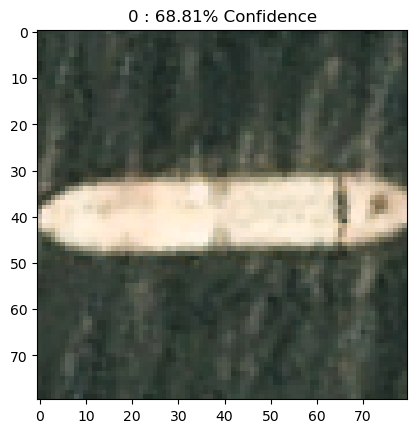

In [236]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(sto_model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [237]:
metrics['Additive Gaussian Noise'] = sto_model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 203ms/step - loss: 0.5525 - categorical_accuracy: 0.7212 - categorical_crossentropy: 0.5525
Original Model                                     Accuracy: 0.9112499952316284                                
Additive Gaussian Noise                            Accuracy: 0.7212499976158142                                
DP Instahide                                       Accuracy: 0.8712499737739563                                


# Differential Privacy Additive Noise and Cut/Mix (DP Instahide)

In [209]:
import keras_cv

cut_mix = keras_cv.layers.CutMix(alpha=1.0)
mix_up = keras_cv.layers.MixUp(alpha=0.2)

def to_dict(image, label):
    image = tf.cast(image, tf.float32)
    return {"images": image, "labels": label}

def cut_mix_and_mix_up(samples):
    samples = cut_mix(samples, training=True)
    samples = mix_up(samples, training=True)
    return samples

def preprocess_for_model(inputs):
    images, labels = inputs["images"], inputs["labels"]
    images = tf.cast(images, tf.float32)
    return images, labels

def cutmix_mixup_fn(image, label):
    img_dict = to_dict(image, label)
    samples = cut_mix_and_mix_up(img_dict)
    return preprocess_for_model(samples)

In [210]:
# keras cutmix/mixup layer takes dictionaries because it's insane
#convert to dictionary of {images:Tensor,labels:Tensor}
cm_train_dataset = train_dataset.map(to_dict, num_parallel_calls=tf.data.AUTOTUNE)
# cutmix/mixup
cm_train_dataset = cm_train_dataset.map(cut_mix_and_mix_up, num_parallel_calls=tf.data.AUTOTUNE)
# convert from dictionary back to tensors
cm_train_dataset = cm_train_dataset.map(preprocess_for_model, num_parallel_calls=tf.data.AUTOTUNE)

cm_train_dataset = cm_train_dataset.cache()
cm_train_dataset = cm_train_dataset.prefetch(tf.data.AUTOTUNE)

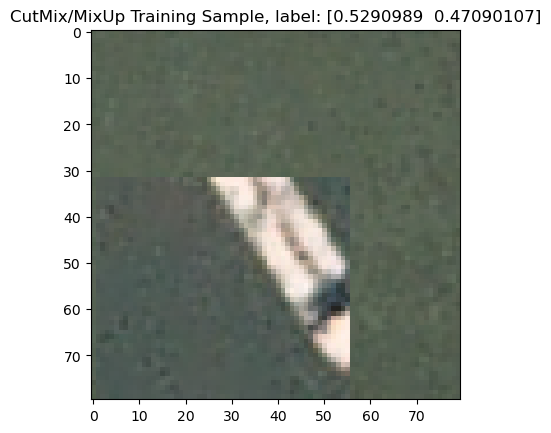

In [211]:
%matplotlib inline

plt.figure()
adv_example = cm_train_examples[7]
plt.imshow(np.clip(adv_example,0,255))
plt.title(f'CutMix/MixUp Training Sample, label: {cm_train_labels[7]}')
plt.show()

In [212]:
inputs = layers.Input(shape=(80,80,3))
noise = layers.GaussianNoise(stddev=1)(inputs)
flat = layers.Flatten()(noise)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

dpi_model = keras.Model(inputs=inputs, outputs=p)

dpi_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [213]:
dpi_model.fit(cm_train_dataset, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 3s 17ms/step - loss: 0.6740 - categorical_accuracy: 0.6266 - categorical_crossentropy: 0.6740
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5842 - categorical_accuracy: 0.7725 - categorical_crossentropy: 0.5842
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5764 - categorical_accuracy: 0.7663 - categorical_crossentropy: 0.5764
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5607 - categorical_accuracy: 0.7759 - categorical_crossentropy: 0.5607
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5620 - categorical_accuracy: 0.7756 - categorical_crossentropy: 0.5620
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5550 - categorical_accuracy: 0.7763 - categorical_crossentropy: 0.5550
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5511 - categorical_accuracy: 0.7750 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.4904 - categorical_accuracy: 0.8066 - categorical_crossentropy: 0.4904
Epoch 58/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4855 - categorical_accuracy: 0.8037 - categorical_crossentropy: 0.4855
Epoch 59/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4890 - categorical_accuracy: 0.8003 - categorical_crossentropy: 0.4890
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4827 - categorical_accuracy: 0.8087 - categorical_crossentropy: 0.4827
Epoch 61/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4849 - categorical_accuracy: 0.8056 - categorical_crossentropy: 0.4849
Epoch 62/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4859 - categorical_accuracy: 0.7997 - categorical_crossentropy: 0.4859
Epoch 63/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4875 - categorical_accuracy: 0.8022 - categorical_crossentropy

4/4 [==============================] - 0s 16ms/step - loss: 0.4723 - categorical_accuracy: 0.8200 - categorical_crossentropy: 0.4723
Epoch 114/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4690 - categorical_accuracy: 0.8109 - categorical_crossentropy: 0.4690
Epoch 115/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4670 - categorical_accuracy: 0.8163 - categorical_crossentropy: 0.4670
Epoch 116/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4707 - categorical_accuracy: 0.8153 - categorical_crossentropy: 0.4707
Epoch 117/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4740 - categorical_accuracy: 0.8056 - categorical_crossentropy: 0.4740
Epoch 118/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4694 - categorical_accuracy: 0.8109 - categorical_crossentropy: 0.4694
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4759 - categorical_accuracy: 0.8100 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.4697 - categorical_accuracy: 0.8084 - categorical_crossentropy: 0.4697
Epoch 169/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4655 - categorical_accuracy: 0.8209 - categorical_crossentropy: 0.4655
Epoch 170/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4622 - categorical_accuracy: 0.8150 - categorical_crossentropy: 0.4622
Epoch 171/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4613 - categorical_accuracy: 0.8191 - categorical_crossentropy: 0.4613
Epoch 172/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4650 - categorical_accuracy: 0.8163 - categorical_crossentropy: 0.4650
Epoch 173/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4606 - categorical_accuracy: 0.8134 - categorical_crossentropy: 0.4606
Epoch 174/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4684 - categorical_accuracy: 0.8166 - categorical_crosse

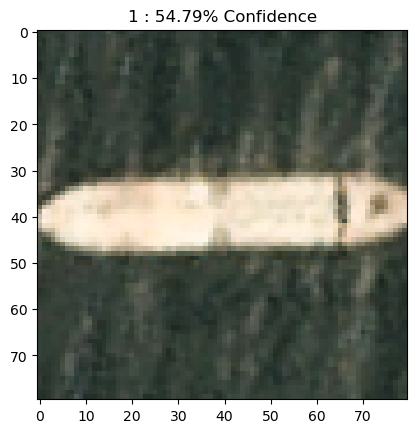

In [214]:
%matplotlib inline

plt.figure()
plt.imshow(examples[5])
confidence = tf.nn.softmax(dpi_model(np.reshape(examples[5],[1,80,80,3])).numpy())[0,1]
if confidence < 0.5:
    pred = 0
    confidence = 1. - confidence
else:
    pred = 1
plt.title('{} : {:.2f}% Confidence'.format(str(pred), confidence*100))
plt.show()

In [215]:
metrics['DP Instahide'] = dpi_model.evaluate(test_dataset.take(-1))
for key in metrics:
    print(f'{key:<50} Accuracy: {metrics[key][1]:<50}')

1/1 [==============================] - 0s 198ms/step - loss: 0.3470 - categorical_accuracy: 0.8712 - categorical_crossentropy: 0.3470
Original Model                                     Accuracy: 0.9112499952316284                                
Additive Gaussian Noise                            Accuracy: 0.9512500166893005                                
DP Instahide                                       Accuracy: 0.8712499737739563                                


# Membership Attack

## Vanilla Model

In [216]:
inputs = layers.Input(shape=(80,80,3))
flat = layers.Flatten()(inputs)
h1 = layers.Dense(50, activation="relu")(flat)
h2 = layers.Dense(50, activation="relu")(h1)
h3 = layers.Dense(50, activation="relu")(h2)
p = layers.Dense(2,activation='linear')(h3)

v_model = keras.Model(inputs=inputs, outputs=p)

v_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(LR),
    metrics=[tf.keras.metrics.CategoricalAccuracy(),
    tf.keras.metrics.CategoricalCrossentropy(from_logits=True)]
)

In [217]:
v_model.fit(train_dataset_p, epochs=n_epochs, verbose=True)

Epoch 1/200
4/4 [==============================] - 2s 17ms/step - loss: 0.7965 - categorical_accuracy: 0.7531 - categorical_crossentropy: 0.7965
Epoch 2/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5742 - categorical_accuracy: 0.7572 - categorical_crossentropy: 0.5742
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5470 - categorical_accuracy: 0.7572 - categorical_crossentropy: 0.5470
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.5285 - categorical_accuracy: 0.7869 - categorical_crossentropy: 0.5285
Epoch 5/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4955 - categorical_accuracy: 0.7887 - categorical_crossentropy: 0.4955
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4426 - categorical_accuracy: 0.8025 - categorical_crossentropy: 0.4426
Epoch 7/200
4/4 [==============================] - 0s 16ms/step - loss: 0.4020 - categorical_accuracy: 0.8234 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.2155 - categorical_accuracy: 0.9116 - categorical_crossentropy: 0.2155
Epoch 58/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2157 - categorical_accuracy: 0.9125 - categorical_crossentropy: 0.2157
Epoch 59/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2184 - categorical_accuracy: 0.9131 - categorical_crossentropy: 0.2184
Epoch 60/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2246 - categorical_accuracy: 0.9137 - categorical_crossentropy: 0.2246
Epoch 61/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2352 - categorical_accuracy: 0.9109 - categorical_crossentropy: 0.2352
Epoch 62/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2483 - categorical_accuracy: 0.9034 - categorical_crossentropy: 0.2483
Epoch 63/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2638 - categorical_accuracy: 0.8994 - categorical_crossentropy

4/4 [==============================] - 0s 16ms/step - loss: 0.1670 - categorical_accuracy: 0.9294 - categorical_crossentropy: 0.1670
Epoch 114/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1678 - categorical_accuracy: 0.9331 - categorical_crossentropy: 0.1678
Epoch 115/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1660 - categorical_accuracy: 0.9328 - categorical_crossentropy: 0.1660
Epoch 116/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1751 - categorical_accuracy: 0.9297 - categorical_crossentropy: 0.1751
Epoch 117/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1719 - categorical_accuracy: 0.9300 - categorical_crossentropy: 0.1719
Epoch 118/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1735 - categorical_accuracy: 0.9275 - categorical_crossentropy: 0.1735
Epoch 119/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1774 - categorical_accuracy: 0.9278 - categorical_crosse

4/4 [==============================] - 0s 16ms/step - loss: 0.1104 - categorical_accuracy: 0.9566 - categorical_crossentropy: 0.1104
Epoch 169/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1130 - categorical_accuracy: 0.9572 - categorical_crossentropy: 0.1130
Epoch 170/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1124 - categorical_accuracy: 0.9575 - categorical_crossentropy: 0.1124
Epoch 171/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1081 - categorical_accuracy: 0.9600 - categorical_crossentropy: 0.1081
Epoch 172/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1018 - categorical_accuracy: 0.9622 - categorical_crossentropy: 0.1018
Epoch 173/200
4/4 [==============================] - 0s 16ms/step - loss: 0.0997 - categorical_accuracy: 0.9628 - categorical_crossentropy: 0.0997
Epoch 174/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1029 - categorical_accuracy: 0.9609 - categorical_crosse

In [218]:
# v_model (vanilla)
# sto_model (additive gaussian noise)
# dpi_model (DP instahide)

def membership_attack(target_model, examples, labels):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    # get gradients (params wrt loss)
    with tf.GradientTape() as tape:
        preds = target_model(examples)
        #print(preds.get_shape())
        loss = tf.reduce_mean(cce(labels, preds))
    grad = tape.gradient(loss, target_model.trainable_weights)

    layers = target_model.layers
    
    # use output layer weight gradients only
    out_grads = tf.math.abs(grad[-4]).numpy()
    #print(out_grads)

    mean = out_grads.mean()
    std = out_grads.std()

    #print('mean:', mean)
    #print('std:', std)
    
    return mean, std

In [219]:
train_dist_params = membership_attack(v_model, train_examples, train_labels)

In [220]:
test_dist_params = membership_attack(v_model, examples, labels)

In [221]:
dist = tfd.Normal(loc=[train_dist_params[0], test_dist_params[0]], scale=[train_dist_params[1], test_dist_params[1]])

In [222]:
# 0 for train dist, 1 for test dist
results = []

for i in tqdm(range(len(train_examples))):
    results.append(np.argmax(dist.prob(membership_attack(v_model, np.reshape(train_examples[i], [1,80,80,3]), np.reshape(train_labels[i], [1,2]))[0]).numpy()))

100%|███████████████████████████████████████████████████████████████████████████████| 3200/3200 [00:41<00:00, 78.02it/s]


In [223]:
classes, counts = np.unique(np.array(results), return_counts=True)
train_count, test_count = counts
print(f'Number of samples in training grad distribution: {train_count}')
print(f'Number of samples in test grad distribution: {test_count}')
print('Total samples:', train_count+test_count)

Number of samples in training grad distribution: 2925
Number of samples in test grad distribution: 275
Total samples: 3200


In [224]:
print('Membership attack accuracy on training samples:', train_count/(train_count+test_count))

Membership attack accuracy on training samples: 0.9140625


## DP Instahide model

In [225]:
cm_train_dist_params = membership_attack(dpi_model, train_examples, train_labels)

In [226]:
cm_test_dist_params = membership_attack(dpi_model, examples, labels)

In [227]:
cm_dist = tfd.Normal(loc=[cm_train_dist_params[0], cm_test_dist_params[0]], scale=[cm_train_dist_params[1], cm_test_dist_params[1]])

In [228]:
# 0 for train dist, 1 for test dist
results = []

for i in tqdm(range(len(train_examples))):
    results.append(np.argmax(dist.prob(membership_attack(dpi_model, np.reshape(train_examples[i], [1,80,80,3]), np.reshape(train_labels[i], [1,2]))[0]).numpy()))

100%|███████████████████████████████████████████████████████████████████████████████| 3200/3200 [00:41<00:00, 77.03it/s]


In [229]:
classes, counts = np.unique(np.array(results), return_counts=True)
train_count, test_count = counts
print(f'Number of samples in training grad distribution: {train_count}')
print(f'Number of samples in test grad distribution: {test_count}')
print('Total samples:', train_count+test_count)

Number of samples in training grad distribution: 3066
Number of samples in test grad distribution: 134
Total samples: 3200


In [230]:
print('Membership attack accuracy on training samples:', train_count/(train_count+test_count))

Membership attack accuracy on training samples: 0.958125


## Additive Gaussian Noise Model

In [238]:
st_train_dist_params = membership_attack(sto_model, train_examples, train_labels)
st_test_dist_params = membership_attack(sto_model, examples, labels)
st_dist = tfd.Normal(loc=[st_train_dist_params[0], st_test_dist_params[0]], 
                     scale=[st_train_dist_params[1], st_test_dist_params[1]])

# 0 for train dist, 1 for test dist
results = []

for i in tqdm(range(len(train_examples))):
    results.append(np.argmax(dist.prob(membership_attack(sto_model, np.reshape(train_examples[i], [1,80,80,3]), np.reshape(train_labels[i], [1,2]))[0]).numpy()))

100%|███████████████████████████████████████████████████████████████████████████████| 3200/3200 [00:41<00:00, 77.33it/s]


In [242]:
classes, counts = np.unique(np.array(results), return_counts=True)
train_count, test_count = counts
print(f'Number of samples in training grad distribution: {train_count}')
print(f'Number of samples in test grad distribution: {test_count}')
print('Total samples:', train_count+test_count)

Number of samples in training grad distribution: 2835
Number of samples in test grad distribution: 365
Total samples: 3200


Increased std dev to 10 for additive noise to see what would happen.

With std dev = 1, accuracy was 0.9

In [243]:
print('Membership attack accuracy on training samples:', train_count/(train_count+test_count))

Membership attack accuracy on training samples: 0.8859375
